# About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends.

### Importing importatnt Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from glob import glob

### Loading Datasets

In [2]:
files= sorted(glob('2021*'))

In [3]:
files

['202101.csv',
 '202102.csv',
 '202103.csv',
 '202104.csv',
 '202105.csv',
 '202106.csv',
 '202107.csv',
 '202108.csv',
 '202109.csv',
 '202110.csv',
 '202111.csv',
 '202112.csv']

In [4]:
data=pd.concat((pd.read_csv(file) for file in files) , ignore_index = True)

### Checking Load Datasets

In [5]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 554.9+ MB


In [7]:
data.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.595063e+06,5.595063e+06,5.590292e+06,5.590292e+06
mean,4.190107e+01,-8.764605e+01,4.190134e+01,-8.764626e+01
std,4.608635e-02,2.872111e-02,4.618916e-02,2.889959e-02
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01
25%,4.188155e+01,-8.766000e+01,4.188184e+01,-8.766000e+01
50%,4.189897e+01,-8.764182e+01,4.189964e+01,-8.764275e+01
75%,4.192914e+01,-8.762773e+01,4.192920e+01,-8.762775e+01
max,4.207000e+01,-8.752000e+01,4.216812e+01,-8.749000e+01


In [8]:
data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
dtype: int64

### I am intereseted to know how much percent of values are null in station details column show that to take informed decision regarding deleting it.

In [9]:
print('start_station_name: ',round((data['start_station_name'].isnull().sum()/data['start_station_name'].count())*100,2),'% null value present.')
print('start_station_id: ', round((data['start_station_id'].isnull().sum()/data['start_station_id'].count())*100,2),'% null value present.')
print('end_station_name: ', round((data['end_station_name'].isnull().sum()/data['end_station_name'].count())*100,2),'% null value present.')
print('end_station_id: ', round((data['end_station_id'].isnull().sum()/data['end_station_id'].count())*100,2),'% null value present.')

start_station_name:  14.09 % null value present.
start_station_id:  14.09 % null value present.
end_station_name:  15.22 % null value present.
end_station_id:  15.22 % null value present.


In [10]:
round((data.isnull().sum()/data.count())*100,2)

ride_id                0.00
rideable_type          0.00
started_at             0.00
ended_at               0.00
start_station_name    14.09
start_station_id      14.09
end_station_name      15.22
end_station_id        15.22
start_lat              0.00
start_lng              0.00
end_lat                0.09
end_lng                0.09
member_casual          0.00
dtype: float64

### We must change dates to date time

In [11]:
data['started_at']=pd.to_datetime(data['started_at'])
data['ended_at']=pd.to_datetime(data['ended_at'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 554.9+ MB


In [13]:
data['duration']=data['ended_at']-data['started_at']

In [14]:
data.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,0 days 00:10:25
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,0 days 00:04:04


In [15]:
data['duration']=data['duration']/np.timedelta64(1,'m') # direct minute conversion not possible so we need to use np.timedelta64

In [16]:
data['duration']=round(data['duration'],2)

In [17]:
data.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,10.42
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,4.07


In [18]:
data['day_of_week']=data['started_at'].dt.dayofweek
data['month']=data['started_at'].dt.month
data['day_of_month']=data['started_at'].dt.day
data['hour_of_day']=data['started_at'].dt.hour

In [19]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration', 'day_of_week', 'month', 'day_of_month',
       'hour_of_day'],
      dtype='object')

#### We can't do much analysis by lat and lng columns so it is better to drop

In [20]:
data.drop('start_lat',axis=1,inplace=True)
data.drop('end_lat',axis=1,inplace=True)
data.drop('start_lng',axis=1,inplace=True)
data.drop('end_lng',axis=1,inplace=True)

In [21]:
data.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,duration,day_of_week,month,day_of_month,hour_of_day
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,member,10.42,5,1,23,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,member,4.07,2,1,27,18


In [22]:
data['end_station_id'].value_counts()

13022                             83390
LF-005                            54020
13042                             44834
13300                             44312
TA1308000050                      43850
                                  ...  
Throop/Hastings Mobile Station        1
20248.0                               1
416                                   1
20999                                 1
401                                   1
Name: end_station_id, Length: 832, dtype: int64

In [23]:
data['start_station_id'].value_counts()

13022           82715
LF-005          47925
13300           46149
13042           44348
TA1308000050    43610
                ...  
437                 1
20248.0             1
20999               1
20258.0             1
20111               1
Name: start_station_id, Length: 834, dtype: int64

### We cant do much with station ids, its better to drop them

In [24]:
data.drop(['start_station_id','end_station_id'],axis=1,inplace=True)

In [25]:
data['ride_id'].nunique()

5595063

### We cant do much with ride_id its better to drop them

In [26]:
data.drop('ride_id',axis=1,inplace=True)

In [27]:
data.head(2)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,duration,day_of_week,month,day_of_month,hour_of_day
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,NaN,member,10.42,5,1,23,16
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,NaN,member,4.07,2,1,27,18


In [28]:
(data.isnull().sum()/data.count())*100

rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    14.085914
end_station_name      15.222123
member_casual          0.000000
duration               0.000000
day_of_week            0.000000
month                  0.000000
day_of_month           0.000000
hour_of_day            0.000000
dtype: float64

In [29]:
data[data['start_station_name'].isnull()]['duration'].mean()

15.716036777170485

In [30]:
data[data['start_station_name'].isnull()]['member_casual'].value_counts() 

member    373123
casual    317686
Name: member_casual, dtype: int64

In [31]:
data[data['end_station_name'].isnull()]['duration'].mean()

24.596587740303946

In [32]:
data[data['end_station_name'].isnull()]['member_casual'].value_counts()

member    374082
casual    365088
Name: member_casual, dtype: int64

In [33]:
data['duration'].mean()

21.93534367888295

In [34]:
data['member_casual'].value_counts()

member    3066058
casual    2529005
Name: member_casual, dtype: int64

#### data is equally distributed for null it would not give much difference in analysis even if we delete null values

In [35]:
data.dropna(inplace=True)

In [36]:
data.drop_duplicates(inplace=True)

In [37]:
(data.isnull().sum()/data.count())*100

rideable_type         0.0
started_at            0.0
ended_at              0.0
start_station_name    0.0
end_station_name      0.0
member_casual         0.0
duration              0.0
day_of_week           0.0
month                 0.0
day_of_month          0.0
hour_of_day           0.0
dtype: float64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4587761 entries, 9 to 5595062
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rideable_type       object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   member_casual       object        
 6   duration            float64       
 7   day_of_week         int64         
 8   month               int64         
 9   day_of_month        int64         
 10  hour_of_day         int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 420.0+ MB


In [39]:
data['duration'].mean()

21.81049754117396

In [40]:
data['member_casual'].value_counts()

member    2539707
casual    2048054
Name: member_casual, dtype: int64

##### Before data cleaning data, no of rows-5595063 
##### After data cleaning data, no of rows-4587761 
##### We lost almost 1 million rows that is huge number
##### But average duration doesnt change after cleaning

## Top starting Point

In [41]:
top_start=pd.DataFrame(data['start_station_name'].value_counts().head(10)).reset_index(level=0).rename(columns={'index':'Station_name', 'start_station_name':'Count_of_ride'})
top_start

,Station_name,Count_of_ride
0,Streeter Dr & Grand Ave,80304
1,Michigan Ave & Oak St,42765
2,Wells St & Concord Ln,41640
3,Millennium Park,40472
4,Clark St & Elm St,39497
5,Wells St & Elm St,36047
6,Theater on the Lake,35796
7,Kingsbury St & Kinzie St,32152
8,Clark St & Lincoln Ave,32010
9,Clark St & Armitage Ave,31477


## Top ending point

In [42]:
top_end=pd.DataFrame(data['end_station_name'].value_counts().head(10)).reset_index(level=0).rename(columns={'index':'Station_name', 'end_station_name':'Count_of_ride'})
top_end

,Station_name,Count_of_ride
0,Streeter Dr & Grand Ave,81786
1,Michigan Ave & Oak St,43501
2,Wells St & Concord Ln,42024
3,Millennium Park,41749
4,Clark St & Elm St,38933
5,Theater on the Lake,36274
6,Wells St & Elm St,35890
7,Clark St & Lincoln Ave,32004
8,Wabash Ave & Grand Ave,31911
9,Kingsbury St & Kinzie St,31774


### Now some eda for duration

In [43]:
print("mean",data['duration'].mean())
print("max",data['duration'].max())
print("min",data['duration'].min())

mean 21.81049754117396
max 55944.15
min -55.9


In [44]:
data[data['duration']<0].head(2) ## negative values not possible so we need to remove these data

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,duration,day_of_week,month,day_of_month,hour_of_day
185773,electric_bike,2021-03-29 15:41:21,2021-03-29 15:41:20,Ashland Ave & Belle Plaine Ave,Ashland Ave & Belle Plaine Ave,member,-0.02,0,3,29,15
267286,classic_bike,2021-03-13 18:02:58,2021-03-13 18:02:57,Dayton St & North Ave,Dayton St & North Ave,casual,-0.02,5,3,13,18


In [45]:
data=data[data['duration']>0]

In [46]:
print("mean",data['duration'].mean())
print("max",data['duration'].max())
print("min",data['duration'].min())

mean 21.811794536662234
max 55944.15
min 0.02


In [47]:
data['duration'].median()

12.2

In [48]:
data['member_casual']=data['member_casual'].map({'member':1, 'casual':0})

In [49]:
data['member_casual'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

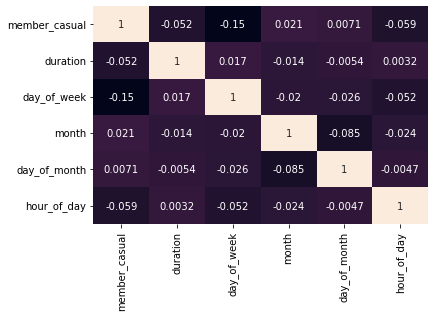

In [50]:
sns.heatmap(data.corr(),cbar=False,annot=True)

In [51]:
data['member_casual']=data['member_casual'].map({1:'member', 0:'casual'})

In [52]:
data['month']=data['month'].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [53]:
data['day_of_week']=data['day_of_week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [54]:
data.head(2)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,duration,day_of_week,month,day_of_month,hour_of_day
9,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,Wood St & Augusta Blvd,member,7.22,Sun,Jan,24,19
10,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,California Ave & North Ave,member,4.53,Sat,Jan,23,12


In [55]:
data['hour_of_day'].value_counts()

17    469568
18    404553
16    384600
15    318320
19    296161
14    288271
13    286387
12    280397
11    239353
20    204281
8     199282
10    190742
9     169111
7     166394
21    159937
22    134967
23     98680
6      91036
0      67549
1      47024
5      34394
2      28550
3      15324
4      12682
Name: hour_of_day, dtype: int64

<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

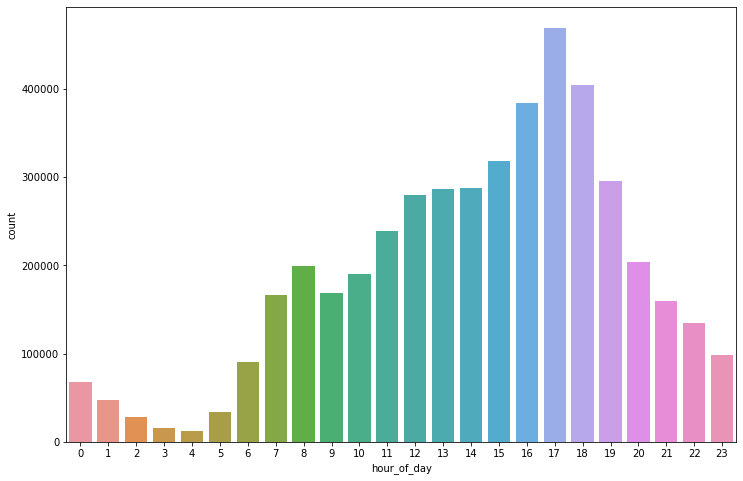

In [56]:
plt.figure(figsize=(12,8))

sns.countplot(x='hour_of_day',data=data)

<AxesSubplot:xlabel='hour_of_day', ylabel='count'>

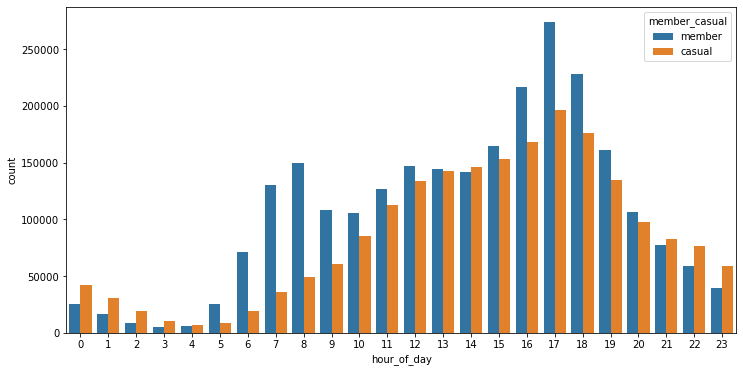

In [57]:
plt.figure(figsize=(12,6))

sns.countplot(x='hour_of_day',data=data,hue='member_casual')

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

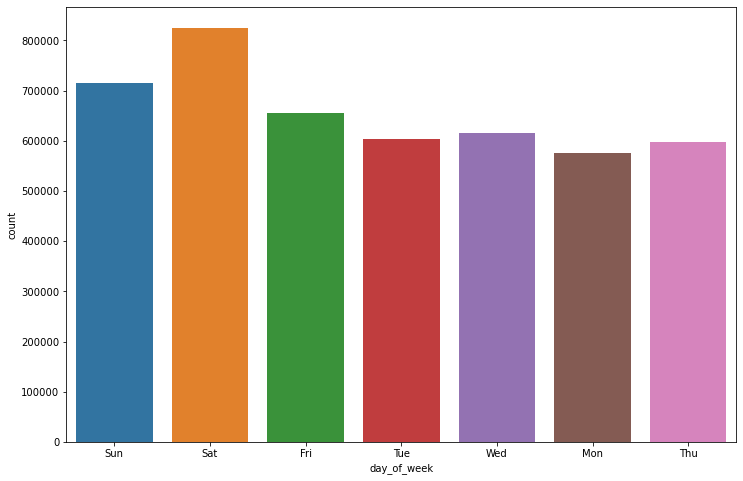

In [58]:
plt.figure(figsize=(12,8))
sns.countplot(x='day_of_week',data=data)

### Least customer on monday and maximum on weekends

In [59]:
data[['day_of_week','member_casual','duration']].groupby(['day_of_week','member_casual']).mean()

duration
day_of_week member_casual           
Fri         casual         30.919244
            member         12.792359
Mon         casual         32.637952
            member         12.725236
Sat         casual         34.873042
            member         14.819880
Sun         casual         37.605504
            member         15.194486
Thu         casual         28.011562
            member         12.353583
Tue         casual         28.804039
            member         12.387995
Wed         casual         28.269492
            member         12.458179

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

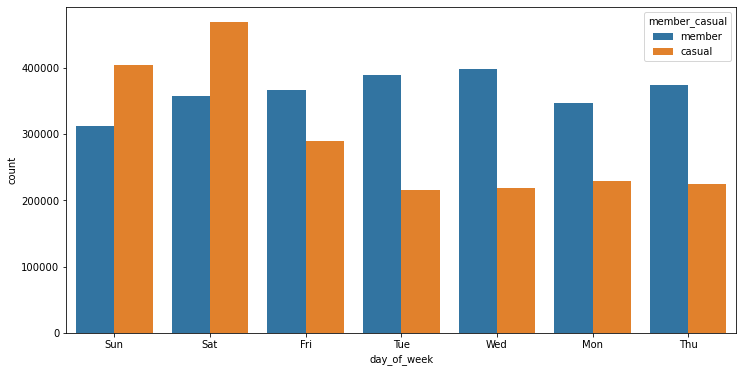

In [60]:
plt.figure(figsize=(12,6))

sns.countplot(x='day_of_week',data=data,hue='member_casual')

### We can see that casual users are more in saturday and sunday wheareas members are more in weekdays

In [61]:
(data['month'].value_counts()/data['month'].count())*100

Jul    15.088883
Aug    14.697695
Sep    13.537144
Jun    13.268199
Oct    10.417644
May     9.829097
Apr     6.499507
Nov     5.577013
Mar     4.483034
Dec     3.844350
Jan     1.820247
Feb     0.937186
Name: month, dtype: float64

In [62]:
15.088883+14.697695+13.537144+13.268199+10.417644+ 9.829097

76.838662

### 76% of total are between may to oct

<AxesSubplot:xlabel='month', ylabel='count'>

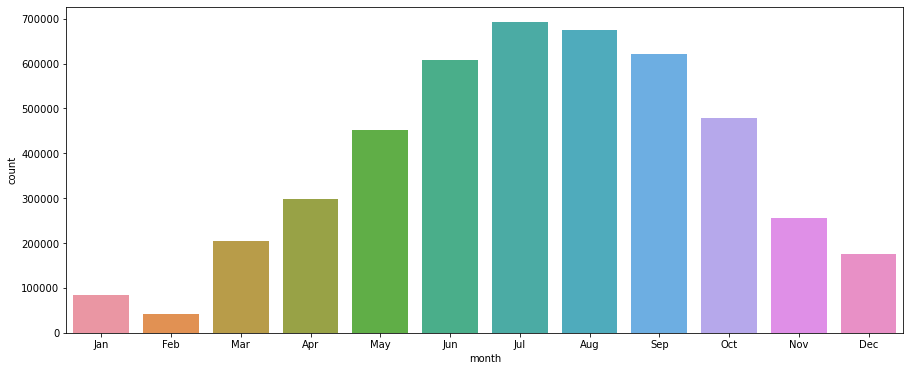

In [63]:
plt.figure(figsize=(15,6))
sns.countplot(x='month',data=data)

<AxesSubplot:xlabel='month', ylabel='count'>

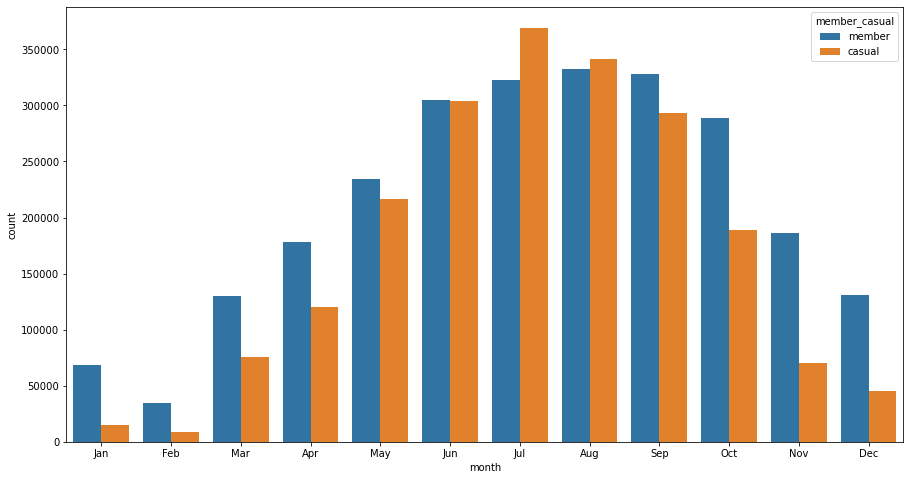

In [64]:
plt.figure(figsize=(15,8))
sns.countplot(x='month',data=data,hue='member_casual')

<AxesSubplot:xlabel='day_of_month', ylabel='count'>

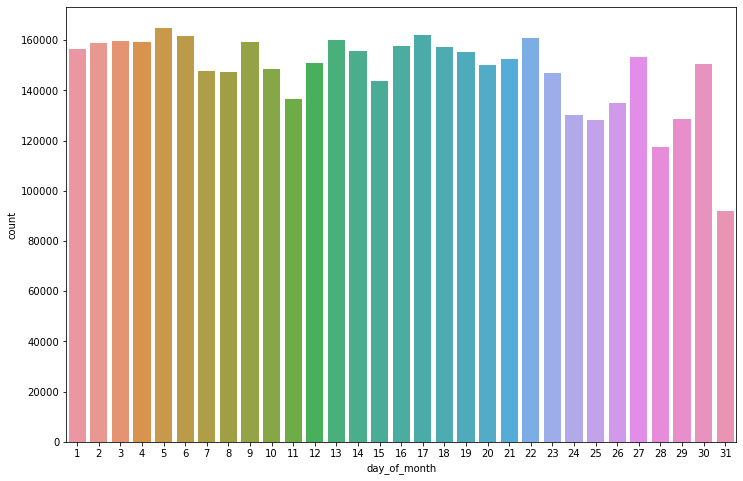

In [65]:
plt.figure(figsize=(12,8))
sns.countplot(x='day_of_month',data=data)

Mostly same every day of month

In [66]:
day_type_mc=pd.DataFrame(data[['day_of_week','rideable_type','member_casual']].groupby(['day_of_week','rideable_type']).member_casual.value_counts())
day_type_mc.to_csv('pivot_1.csv')

In [67]:
day_type_mc

member_casual
day_of_week rideable_type member_casual               
Fri         classic_bike  member                281118
                          casual                176189
            docked_bike   casual                 42046
            electric_bike member                 84626
                          casual                 71755
Mon         classic_bike  member                270003
                          casual                135308
            docked_bike   casual                 36413
            electric_bike member                 76452
                          casual                 57182
Sat         classic_bike  casual                300072
                          member                285182
            docked_bike   casual                 78331
            electric_bike casual                 89825
                          member                 71836
Sun         classic_bike  casual                256390
                          member                252008
            docked_bike   casual                 70327
            electric_bike casual                 76952
                          member                 59156
Thu         classic_bike  member                287384
                          casual                136798
            docked_bike   casual                 27651
            electric_bike member                 86056
                          casual                 59727
Tue         classic_bike  member                298035
                          casual                125411
            docked_bike   casual                 29597
            electric_bike member                 90065
                          casual                 59898
Wed         classic_bike  member                306406
                          casual                131113
            docked_bike   casual                 27597
                          member                     1
            electric_bike member                 91258
                          casual                 59395

In [68]:
data['day_of_week'].value_counts()

Sat    825246
Sun    714833
Fri    655734
Wed    615770
Tue    603006
Thu    597616
Mon    575358
Name: day_of_week, dtype: int64

In [75]:
data[['rideable_type','duration']].groupby(['rideable_type']).mean().reset_index(level=0).rename(columns={'duration':'mean_duration'}).sort_values(by=['mean_duration'],ascending=False)

,rideable_type,mean_duration
1,docked_bike,78.108655
0,classic_bike,18.371911
2,electric_bike,15.611305


In [74]:
data[['day_of_week','duration']].groupby(['day_of_week']).mean().reset_index(level=0).rename(columns={'duration':'mean_duration'}).sort_values(by=['mean_duration'],ascending=False)

,day_of_week,mean_duration
3,Sun,27.850076
2,Sat,26.197641
0,Fri,20.808743
1,Mon,20.647400
5,Tue,18.238528
4,Thu,18.227159
6,Wed,18.058527


Saturday and sunday having maximum trip duration

In [77]:
data_day_type=data[['day_of_week','rideable_type','duration']].groupby(['day_of_week','rideable_type']).mean()
data_day_type

duration
day_of_week rideable_type           
Fri         classic_bike   17.401629
            docked_bike    79.404632
            electric_bike  15.017594
Mon         classic_bike   17.506206
            docked_bike    75.605355
            electric_bike  15.199509
Sat         classic_bike   21.648165
            docked_bike    76.588063
            electric_bike  18.251797
Sun         classic_bike   22.482061
            docked_bike    83.116951
            electric_bike  19.344583
Thu         classic_bike   15.848106
            docked_bike    78.145540
            electric_bike  13.784585
Tue         classic_bike   15.994245
            docked_bike    72.050577
            electric_bike  13.955188
Wed         classic_bike   15.777579
            docked_bike    77.450416
            electric_bike  13.802795

Not such correlation found

<AxesSubplot:xlabel='day_of_week,rideable_type'>

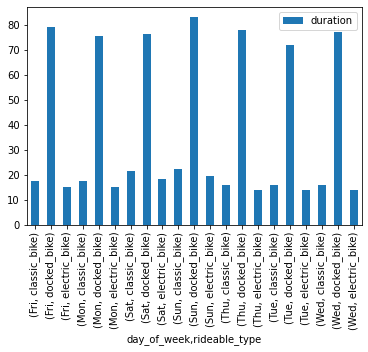

In [84]:
data_day_type.plot(kind='bar')

### 76% of the total is between May to Oct.
#### So our main focus should be between May to Oct.

### Saturday and Sunday have a maximum trip duration
#### We should introduce a new rate per hour for weekends.

### Mostly same every day of the month.
#### Nothing as such for now.

### We can see that casual users are more on Saturday and Sunday whereas members are more on weekdays.
#### Advertisements should be given more emphasis on weekends to convert casual customers to members.

### Least customer on Monday and maximum on weekends
#### Mostly member use on Monday.


## Thank You!